# Problem statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# 1. importing Required libraries

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# calling the dataset

df = pd.read_csv("census.csv")
pd.set_option('display.max_columns',None)   # to print all columns ans all rows
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


observation = in the problem statement , we are instructed that we have to predict that person which income is greater is 50 k, so our target is income.

# 2. EDA

In [3]:
# getting the shape of dataset

df.shape

(32560, 15)

In [4]:
# checking the all columns name

df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# getting the types of all columns

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

observtion = there is not any float values

In [6]:
# checking the all informtion of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


observation = dataset is not having float values , and the 6 columns is having int value , and 9 columns is having obj values

In [7]:
# checking the unique values

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

observstion = that all are getting some unique values of each columns in the dataset

In [8]:
# checking the null  values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

observation = no null values

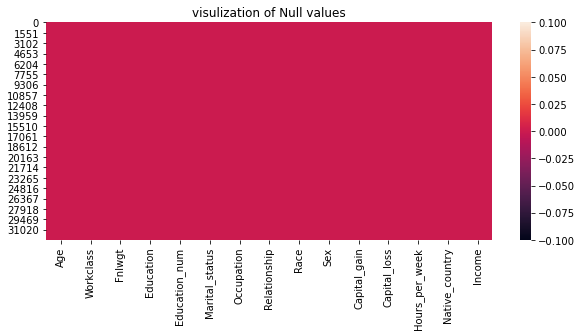

In [9]:
# rechecking the null values with the help of heatmap

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull())
plt.title("visulization of Null values")
plt.show()

observstion = now, it is more clear that there is null values with the help of heatmap

In [10]:
# checking the unique data of target value

df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
# check the value count of each to see each columns

for i in df.columns:
    print(df[i].value_counts())    

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

observation = here we can see there is some '?' in workclass, occupation, and native_company columns.

In [12]:
# checkling the mode of workclass 

df['Workclass'].mode()

0     Private
dtype: object

observation = as we can see the workclass is private columns

In [13]:
# Repalcing the ? .

df['Workclass'] = df.Workclass.replace('?','Private')

In [14]:
# chekcking the occupation columns mode

df['Occupation'].mode()

0     Prof-specialty
dtype: object

In [15]:
df['Ocupation'] = df.Occupation.replace('?','prof-speciality')

In [16]:
# checkling the Native_country columns mode

df["Native_country"].mode()

0     United-States
dtype: object

In [17]:
# replacing the '?'

df["Native_country"] = df.Native_country.replace("?","uited-state")

observation = we hav repplace all the columns which is having "?"

# 3. Dropping the columns 

In [18]:
# checking the value count of Capital_gain

df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

observation = mostlly values is zero so i will drop htis columns

In [19]:
# checking again another columns capital_loss

df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

observation = again, this columns is mostly having zero values , so i wil also drop it.

In [20]:
df = df.drop(["Capital_gain"],axis=1)

In [21]:
df = df.drop(["Capital_loss"],axis=1)

In [22]:
# checking the description of dataset

df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


observation = describe process helps to analys outliers and skewness, because it only summarized for numerical columns

# 4. Visualization:

In [23]:
# seprating the categrical columns

categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_columns.append(i)
print(categorical_columns)        

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income', 'Ocupation']


obseravation = this is all are columns which is having obj type data

In [24]:
# seprating the numerical columns

numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_columns.append(i)
print(numerical_columns)        

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


observation = that all columns is having numerical values

# 5. univariate Analysis:

<Figure size 576x288 with 0 Axes>

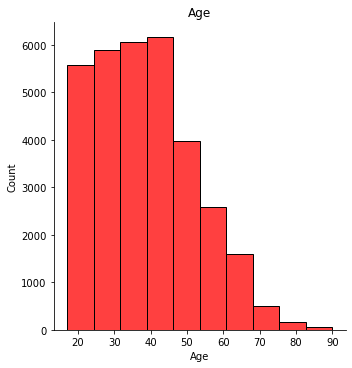

<Figure size 576x288 with 0 Axes>

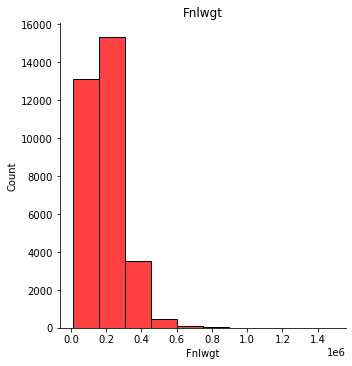

<Figure size 576x288 with 0 Axes>

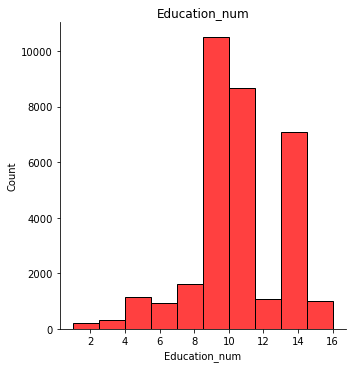

<Figure size 576x288 with 0 Axes>

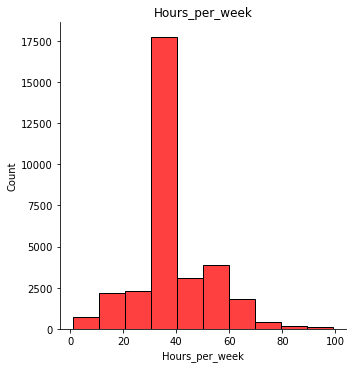

In [25]:
for i in df[numerical_columns]:
    plt.figure(figsize = (8,4))
    sns.displot(df[i], bins = 10, color = 'r')
    plt.title(i)
    plt.show()

observation = all the numerical columns are skewwd, but age is mostly skewed

<AxesSubplot:xlabel='Income', ylabel='count'>

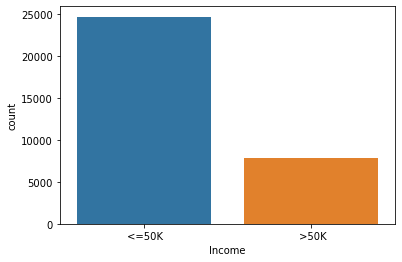

In [26]:
# count plot for income

sns.countplot(df['Income'])

observation = here we can see the people who is geting salry >50K IS very low... and also we are getting data imbalncing issue

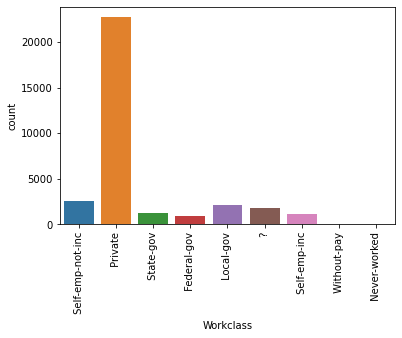

In [27]:
sns.countplot(df["Workclass"])
plt.xticks(rotation =90); 

observation = here we can see the private sector for working is very high. and without pay and never worked people is very low

<AxesSubplot:xlabel='Education_num', ylabel='count'>

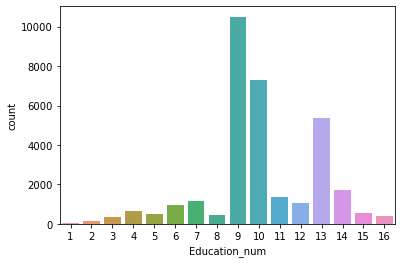

In [28]:
#count ppplot for education_num

sns.countplot(df["Education_num"])

observation = 9 ,10,11 has maximum workres...and 1,2,3 has very less people

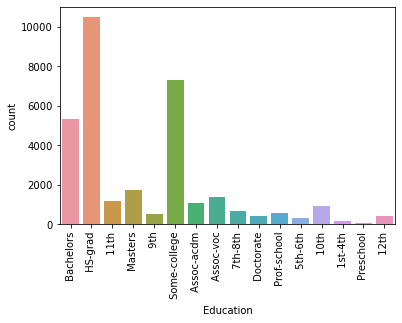

In [29]:
# countplot for education

sns.countplot(df["Education"])
plt.xticks(rotation = 90);

observation = plots are saying Hs-grad, Some-college , bacelors , has maximum count, means they have so much chance to get job

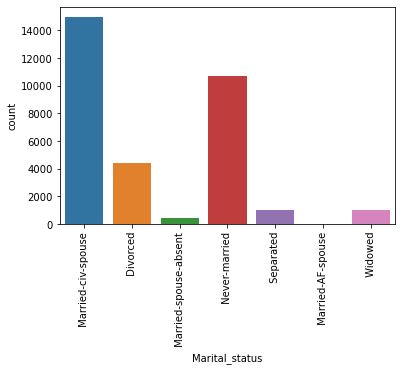

In [30]:
# count pplots for Martial_plots

sns.countplot(df["Marital_status"])
plt.xticks(rotation = 90);

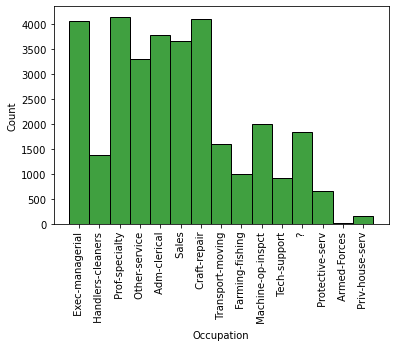

In [31]:
# Hist plot for occupation:

sns.histplot(df["Occupation"],color = 'green')
plt.xticks(rotation = 90);

observation = Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

In [32]:
#Checking the value count of Relationship column

df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

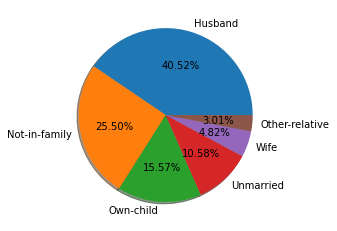

In [33]:
#Ploting pie chart for Relationship

labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

observation = By looking into the pie chart most of the count is with Husband, Not-in-family and own-child.

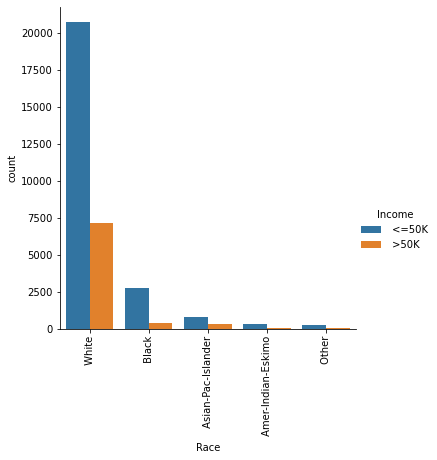

In [34]:
#Factor plot for Race

sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

obseravtion = In US white people have more chance of getting job than any other raced people.

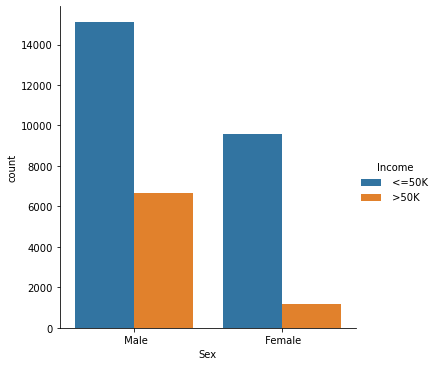

In [35]:
# factor plot for sex

sns.factorplot("Sex",kind="count",data=df,hue="Income")
plt.xticks(rotation = 0);

observartion = male has high count of getting jobs as compare to woman, and another thing mens has high counts to get job >50k

In [36]:
# checking the value count of sex columns

df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

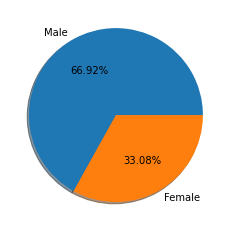

In [37]:
# plotting pie chart for sex

labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(df["Sex"].value_counts(), labels=labels, autopct="%1.2f%%", shadow = True)
plt.show()

obseravtion = men are working more as compare to woman 

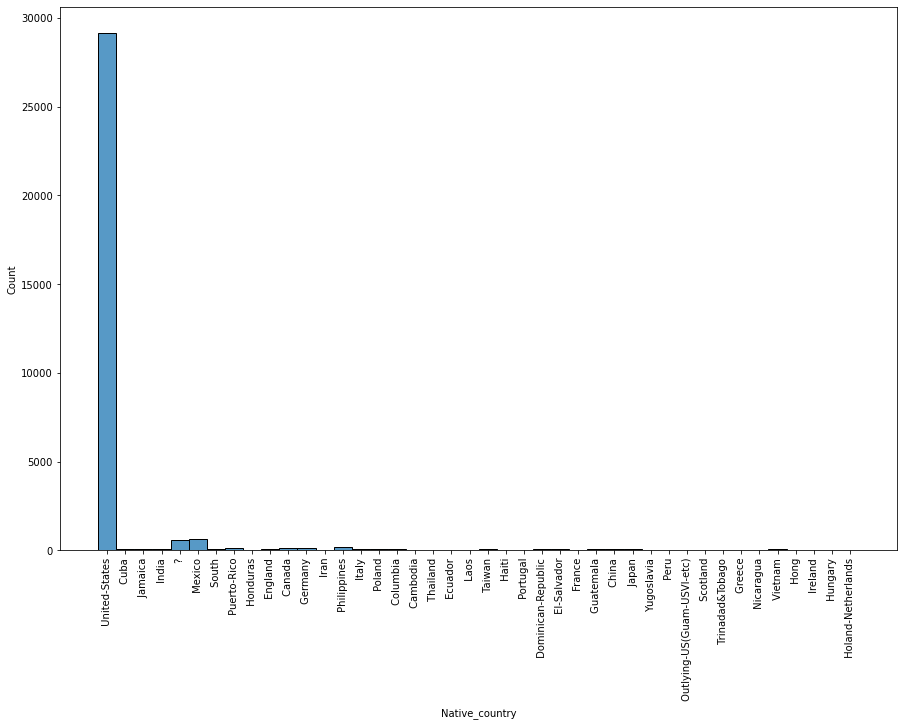

In [38]:
# histplot for native_country

plt.figure(figsize=(15,10))
sns.histplot(df["Native_country"])
plt.xticks(rotation =90);

observation = most of the people in us are getting job

# 6. Bivariate Analysis:

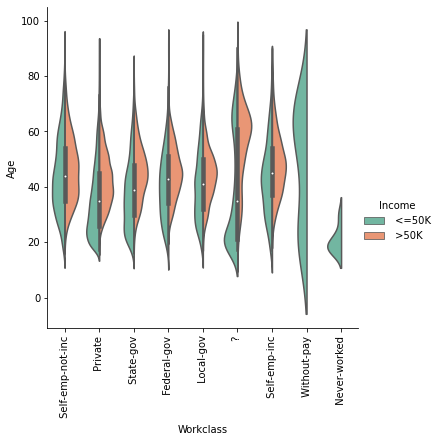

In [39]:
# Let's plot catplot for Workclass and Age

sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

OBSERVATION = all  the person have chance to get >50k income , but only without pay have not any chance

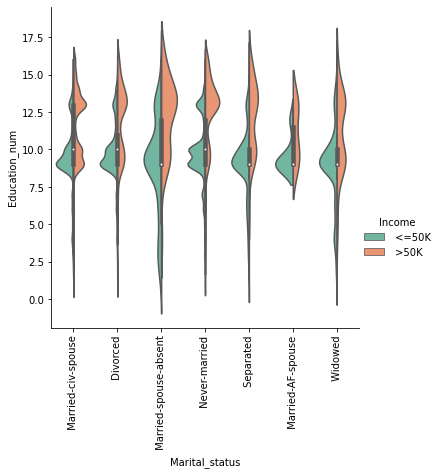

In [40]:
# Let's catplot for marital_status  and educational_num

sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

observation = married-civ-spouse have high number of education

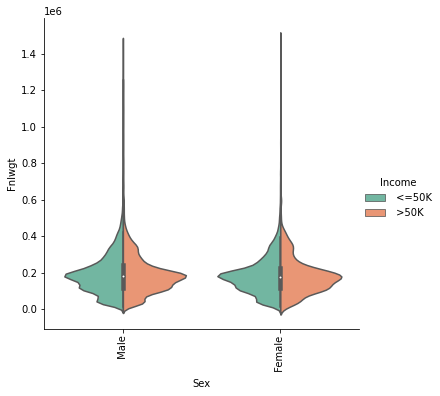

In [41]:
# Let's catplot for sex and fnlwgt

sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

observationn = bpth the male and fekmale have same value

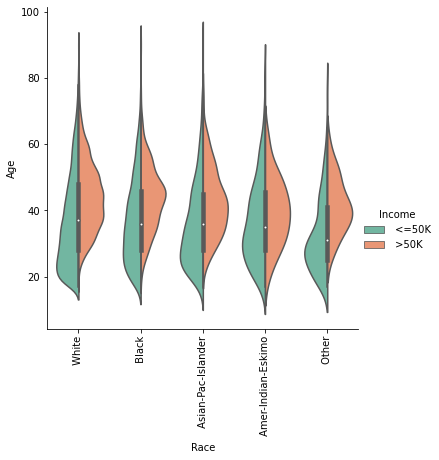

In [42]:
# Let's  catplot for race and Age

sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

observation = white has chance to getting more than 50k 

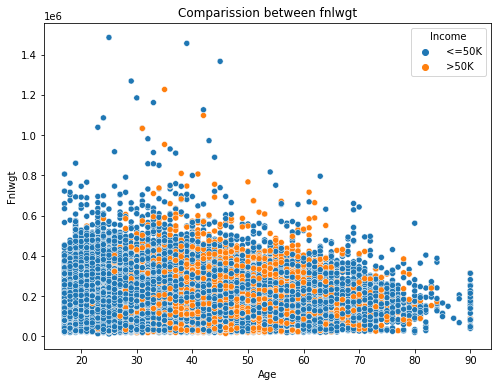

In [43]:
# comparision between feature and age

plt.figure(figsize=(8,6))
plt.title("Comparission between fnlwgt")
sns.scatterplot(df["Age"],df["Fnlwgt"],hue = df["Income"]);

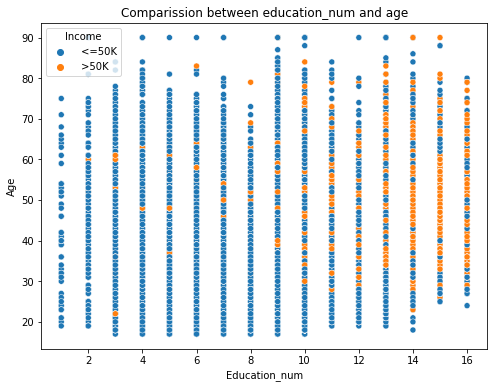

In [44]:
# comparision between feature and age

plt.figure(figsize=(8,6))
plt.title("Comparission between education_num and age")
sns.scatterplot(df["Education_num"],df["Age"],hue = df["Income"]);

observation = People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

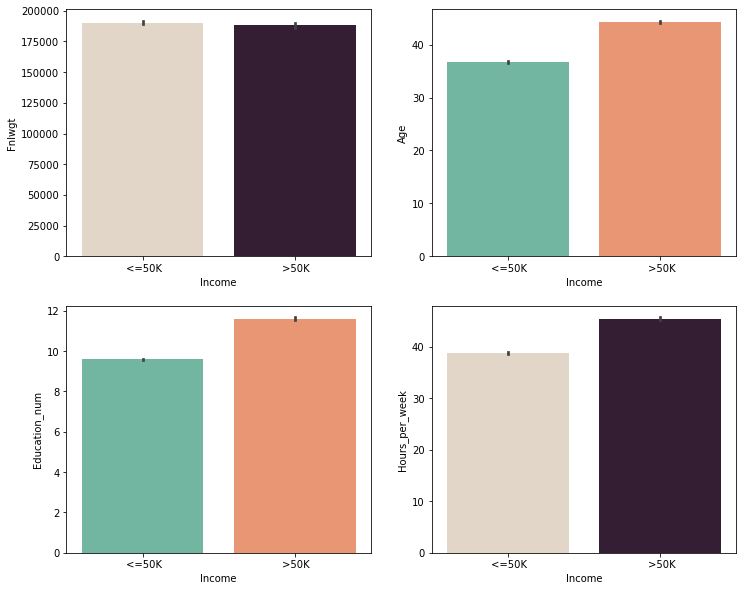

In [45]:
fig,axes = plt.subplots(2,2,figsize=(12,10))

# checking income with fnlwgt
sns.barplot(x="Income",y="Fnlwgt",ax=axes[0,0],data=df,palette='ch:.25')

# checking income with Age
sns.barplot(x="Income",y="Age",ax=axes[0,1],data=df,palette='Set2')

# checking income with education_num
sns.barplot(x="Income",y="Education_num",ax=axes[1,0],data=df,palette='Set2')

# checking income with hours per week 
sns.barplot(x="Income",y="Hours_per_week",ax=axes[1,1],data=df,palette='ch:.25')

plt.show()

observation = With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.
              With Age the chance of getting >50k is high compared to chance of getting income <=50k.
              With Education_num the chance of getting income >50k is very high than <=50k.
              With hours_per_week also the chance of getting income >50k is high.

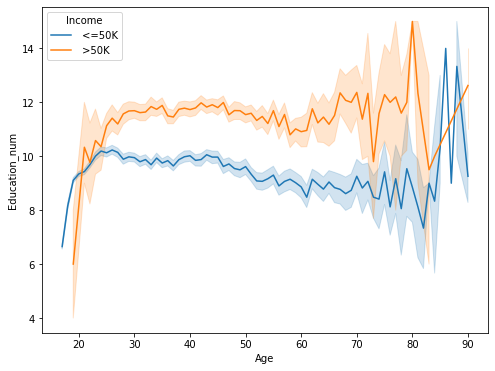

In [46]:
# comparission between feature using line plot

plt.figure(figsize=(8,6))
sns.lineplot(df['Age'],df['Education_num'],hue=df['Income']);

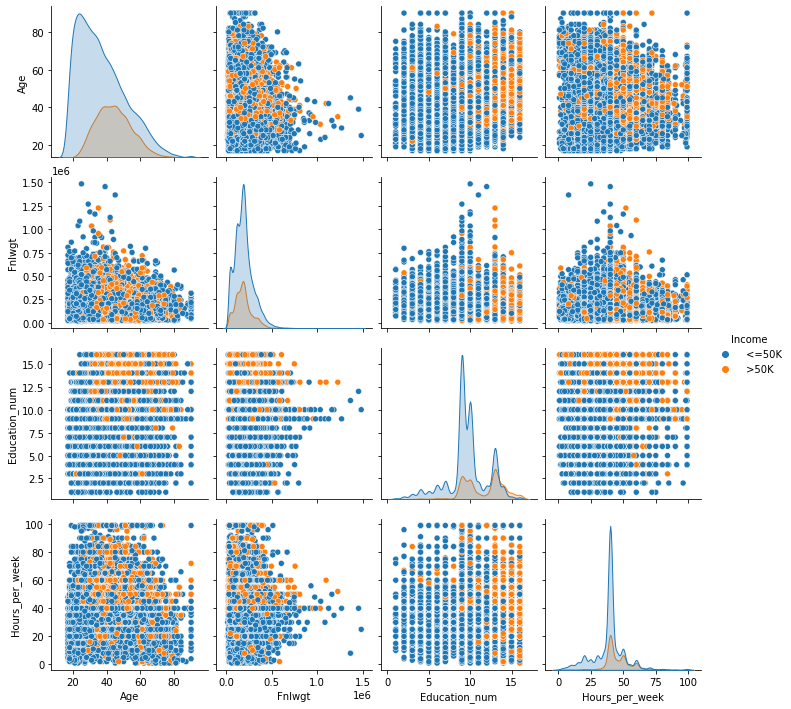

In [47]:
# pair plotting for df

sns.pairplot(df,hue="Income")

# 7. Checking for outliers

<AxesSubplot:>

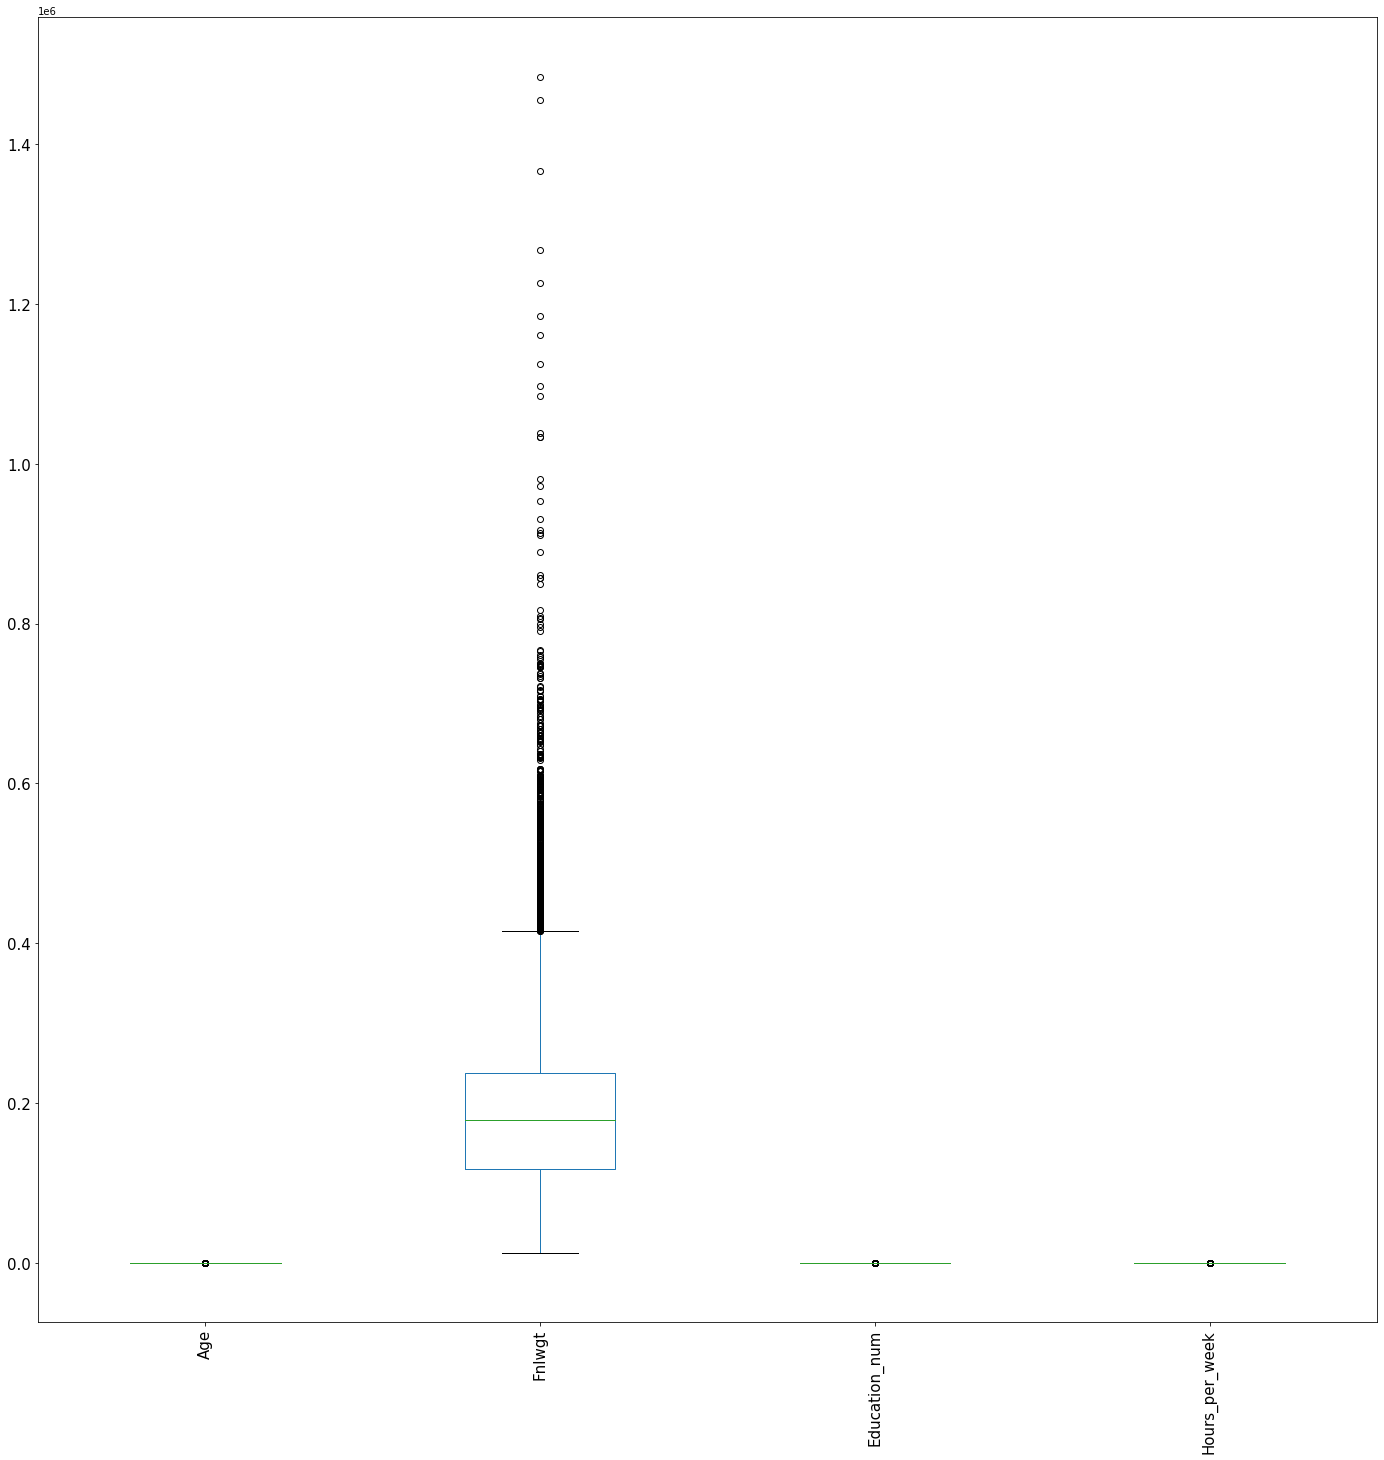

In [48]:
# boxpplot to check outliers

df.plot(rot=90,kind='box',fontsize=15,figsize=(24,24))

obseravtion = there are outliers in all numerical columns 

# 8. Removing Outliers

In [49]:
#Taking all the column names with outliers as a list

dfoutliers=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

# 9. Zscore Method:

In [50]:
from scipy.stats import zscore

z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Ocupation
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,Exec-managerial
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,Handlers-cleaners
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,Handlers-cleaners
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,Prof-specialty
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,Exec-managerial


observation = i have removed all outliers 

In [51]:
# checking the datset after the removing outliers and doping columns

df_new.shape

(31461, 14)

In [52]:
df.shape

(32560, 14)

In [53]:
# dataloss in percentage method

Dataloss=(((32560-31461)/32560)*100)
Dataloss

3.3753071253071254

observation = we are not getting result , so will try another method

# 10. I Q R method:

In [54]:
# 1st quantile
Q1=dfoutliers.quantile(0.25)

# 3rd quantile
Q3=dfoutliers.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
# checking the shape agaim

df_1.shape

(21950, 14)

In [56]:
df.shape

(32560, 14)

In [57]:
# dataloss again

dataloss = (((32560-21950)/32560)*100)
dataloss

32.58599508599509

observation = now here we can see i is giving the best result with lqr method

In [58]:
# checking for skewness

df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

observation = it is getting so much skew in fnlwgt

# 11. removing skewness

In [59]:
fea=["Fnlwgt"]

In [60]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [61]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [62]:
#Checking skewness again

df_new[fea].skew()

Fnlwgt   -0.034507
dtype: float64

# 12. label encoding

In [63]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income', 'Ocupation']


In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)
df_new[cat_col].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Ocupation
0,6,8,2,4,0,4,1,39,0,4
1,4,10,0,6,1,4,1,39,0,6
2,4,1,2,6,0,2,1,39,0,6
3,4,8,2,10,5,2,0,5,0,10
4,4,11,2,4,5,4,0,39,0,4


In [65]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Ocupation
0,50,6,-1.114171,8,13,2,4,0,4,1,13,39,0,4
1,38,4,0.427192,10,9,0,6,1,4,1,40,39,0,6
2,53,4,0.607320,1,7,2,6,0,2,1,40,39,0,6
3,28,4,1.487719,8,13,2,10,5,2,0,40,5,0,10
4,37,4,1.048962,11,14,2,4,5,4,0,40,39,0,4


datset after encoding

In [66]:
cor=df_new.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Ocupation
Age,1.000000,0.013841,-0.066519,-0.000447,0.053361,-0.286424,-0.013628,-0.268028,0.030679,0.091664,0.097510,-0.000777,0.248351,-0.013628
Workclass,0.013841,1.000000,-0.014309,0.023067,0.052631,-0.064271,0.248164,-0.090722,0.048366,0.095209,0.128717,-0.006383,0.051504,0.248164
Fnlwgt,-0.066519,-0.014309,1.000000,-0.024191,-0.033150,0.027732,0.003595,0.008287,-0.008299,0.025290,-0.015566,-0.053338,-0.004586,0.003595
Education,-0.000447,0.023067,-0.024191,1.000000,0.356040,-0.039094,-0.021625,-0.015121,0.015552,-0.024911,0.061325,0.058092,0.077526,-0.021625
Education_num,0.053361,0.052631,-0.033150,0.356040,1.000000,-0.065568,0.112686,-0.102497,0.030849,0.016662,0.160483,0.022528,0.337595,0.112686
Marital_status,-0.286424,-0.064271,0.027732,-0.039094,-0.065568,1.000000,-0.009028,0.185772,-0.067546,-0.127375,-0.197532,-0.021275,-0.198475,-0.009028
Occupation,-0.013628,0.248164,0.003595,-0.021625,0.112686,-0.009028,1.000000,-0.076199,0.007311,0.080495,0.071974,-0.011770,0.074643,1.000000
Relationship,-0.268028,-0.090722,0.008287,-0.015121,-0.102497,0.185772,-0.076199,1.000000,-0.115216,-0.582940,-0.263412,-0.005806,-0.251506,-0.076199
Race,0.030679,0.048366,-0.008299,0.015552,0.030849,-0.067546,0.007311,-0.115216,1.000000,0.088642,0.045331,0.142246,0.072451,0.007311
Sex,0.091664,0.095209,0.025290,-0.024911,0.016662,-0.127375,0.080495,-0.582940,0.088642,1.000000,0.239039,-0.008325,0.216665,0.080495


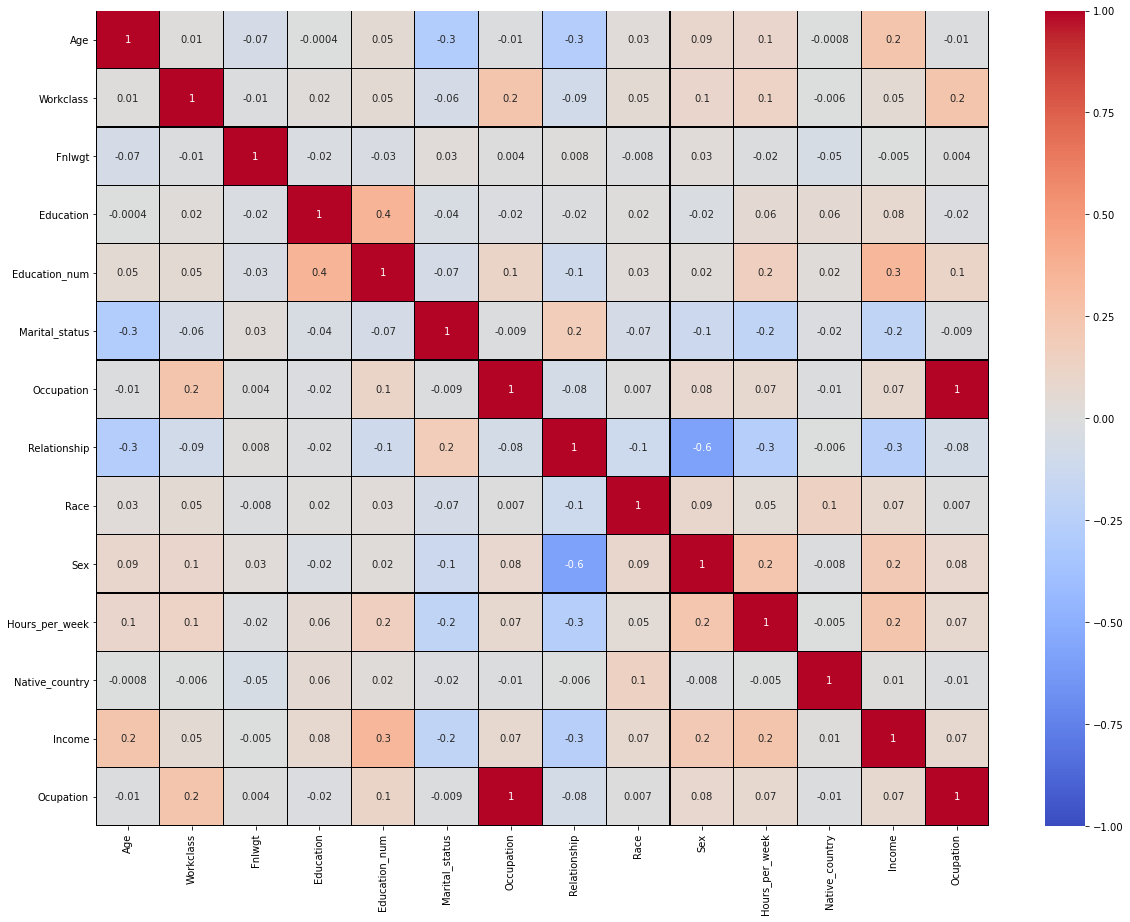

In [67]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

observation = Workclass and Fnlwgt has very less correlation with target.
Native_country, Occupation, Race and Education has less correlation with target column.

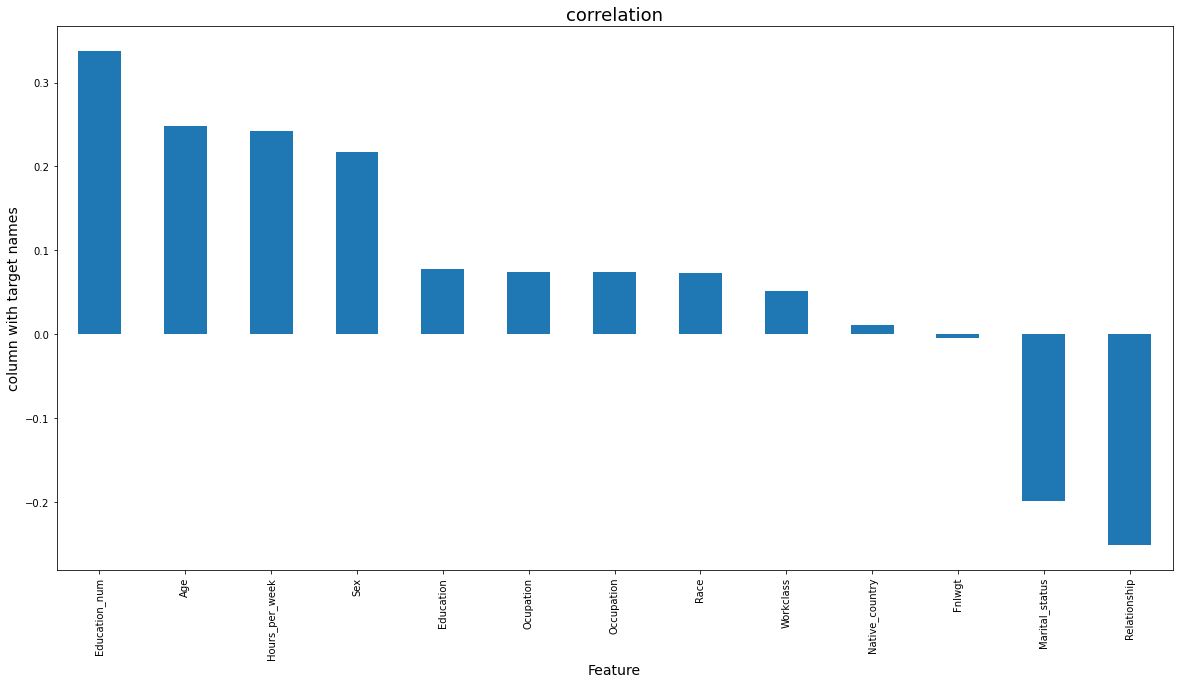

In [68]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

observation = fnlwgt and native_country has very less,  and we can drop it

In [69]:
#Droping less correlated column
df_new = df_new.drop(["Fnlwgt"],axis=1)

In [70]:
#seprating the columns

x = df_new.drop("Income",axis=1)
y = df_new["Income"]

# scalling the dataset using standrd scaler

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [72]:
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Ocupation
0,50,6,8,13,2,4,0,4,1,13,39,4
1,38,4,10,9,0,6,1,4,1,40,39,6
2,53,4,1,7,2,6,0,2,1,40,39,6
3,28,4,8,13,2,10,5,2,0,40,5,10
4,37,4,11,14,2,4,5,4,0,40,39,4


In [ ]:
Finding Best Random and Accuracy

In [75]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [76]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8277359889818837  on Random_state  138


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# classification algorithm

In [81]:
#importing necessary libraries.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Decision tree classifier

In [82]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))


Accuracy Score: 0.7832397499735142
Confusion Matrix: [[6185  963]
 [1083 1208]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7148
           1       0.56      0.53      0.54      2291

    accuracy                           0.78      9439
   macro avg       0.70      0.70      0.70      9439
weighted avg       0.78      0.78      0.78      9439



Dtc is giving 78% score

# Random Forest classifier

In [83]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8261468375887276
Confusion Matrix: [[6483  665]
 [ 976 1315]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7148
           1       0.66      0.57      0.62      2291

    accuracy                           0.83      9439
   macro avg       0.77      0.74      0.75      9439
weighted avg       0.82      0.83      0.82      9439



# supportvector classifier

In [84]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8284775929653565
Confusion Matrix: [[6746  402]
 [1217 1074]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7148
           1       0.73      0.47      0.57      2291

    accuracy                           0.83      9439
   macro avg       0.79      0.71      0.73      9439
weighted avg       0.82      0.83      0.81      9439



# k - Neighbour classifier

In [85]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8182010806229474
Confusion Matrix: [[6407  741]
 [ 975 1316]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7148
           1       0.64      0.57      0.61      2291

    accuracy                           0.82      9439
   macro avg       0.75      0.74      0.74      9439
weighted avg       0.81      0.82      0.81      9439



# Gradient Boosting Classifier

In [86]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8461701451424939
Confusion Matrix: [[6670  478]
 [ 974 1317]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7148
           1       0.73      0.57      0.64      2291

    accuracy                           0.85      9439
   macro avg       0.80      0.75      0.77      9439
weighted avg       0.84      0.85      0.84      9439



# Logistic Regressor

In [90]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predlr))
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy Score: 0.808136455132959
Confusion Matrix: [[6685  463]
 [1348  943]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7148
           1       0.67      0.41      0.51      2291

    accuracy                           0.81      9439
   macro avg       0.75      0.67      0.70      9439
weighted avg       0.79      0.81      0.79      9439



# cross validation score

In [91]:
#Importing library

from sklearn.model_selection import cross_val_score

In [92]:
# cv score for Logistic Regression 

print(cross_val_score(LR,X,y,cv=5).mean())

0.8049014035817554


In [93]:
# cv score for Decision Tree Classifier

print(cross_val_score(DTC,X,y,cv=5).mean())

0.7803310704867992


In [94]:
# cv score for Random Forest Classifier

print(cross_val_score(RFC,X,y,cv=5).mean())

0.8187278794620285


In [95]:
# cv score for Support Vector Classifier

print(cross_val_score(SV,X,y,cv=5).mean())

0.8252758920723327


In [96]:
# cv score for KNN Classifier

print(cross_val_score(knn,X,y,cv=5).mean())

0.8140557137270656


In [97]:
# cv score for Gradient Boosting Classifier

print(cross_val_score(GBC,X,y,cv=5).mean())

0.8404692839772221


observation = Above are the cross validation scores of DTC, RFC, SVM, KNN, GBC,  and LR.

By looking into the difference of model accuracy and cross validation score i found that GBC as best model.

# Hyper Parameter Tunning :

In [123]:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV

In [127]:
parameter = {'criterion':['friedman_mse'],
             'max_depth': [3],
             'n_estimators':[100],
             'max_features': ['None','auto','sqrt']}

In [128]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [132]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [3],
                         'max_features': ['None', 'auto', 'sqrt'],
                         'n_estimators': [100]})

In [130]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 100}

In [131]:
Final_mod=GradientBoostingClassifier(criterion='friedman_mse',max_depth=3, max_features='auto', n_estimators=100)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

84.61701451424939


observation = i got 84.61% score by GBC, which is very good score

# saving the model

In [133]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Censusincome.pkl")

['Censusincome.pkl']

# thank you 